<a href="https://colab.research.google.com/github/marco-milanesi/dynamic-weighing/blob/main/CORR_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic weighing

In [1]:
!wget https://raw.githubusercontent.com/EdoGitMira/Progetto_Laboratorio_Misure_pesatura_dinamica/main/dataset/giusti_dataset_with%20outlier/dataset_interval_5.csv

--2022-01-31 09:23:43--  https://raw.githubusercontent.com/EdoGitMira/Progetto_Laboratorio_Misure_pesatura_dinamica/main/dataset/giusti_dataset_with%20outlier/dataset_interval_5.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289656 (283K) [text/plain]
Saving to: ‘dataset_interval_5.csv’

dataset_interval_5. 100%[===================>] 282.87K  --.-KB/s    in 0.03s   

2022-01-31 09:23:43 (8.53 MB/s) - ‘dataset_interval_5.csv’ saved [289656/289656]



# Linear Regression

## Import packages


In [2]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Loading Data

In [3]:
data = pd.read_csv('dataset_interval_5.csv',sep=';')
print("Loaded: ",len(data))
y = data.values[:,1]
x = data.values[:,3:]
data

Loaded:  2447


,Unnamed: 0,0,1,2,3,4,5,6
0,0,0.940722,80,0.938834,0.941931,0.939766,0.940408,0.939428
1,1,0.940724,80,0.939290,0.940665,0.941895,0.938687,0.939969
2,2,0.940726,80,0.940848,0.939980,0.941471,0.939168,0.940868
3,3,0.940727,80,0.940688,0.939983,0.938945,0.942825,0.938104
4,4,0.940729,80,0.940893,0.939652,0.939793,0.940104,0.939654
...,...,...,...,...,...,...,...,...
2442,2442,1.231898,615,1.231396,1.232614,1.233661,1.229547,1.236236
2443,2443,1.231903,615,1.234054,1.238996,1.229197,1.233633,1.227467
2444,2444,1.231909,615,1.236534,1.231093,1.232181,1.234308,1.234608
2445,2445,1.231914,615,1.231092,1.231282,1.234466,1.231617,1.233109


# PCA

Total Variance in our dataset is:  0.04389409626539487
The 95% variance we want to have is:  0.041699391452125124

Variance explain with 2 components:  0.043874409291364456
Variance explain with 5 components:  0.04389409626539487
Variance explain with 10 components:  0.04389409626539487
Variance explain with 12 components:  0.04389409626539487
Variance explain with 18 components:  0.04389409626539487
Variance explain with 20 components:  0.04389409626539487


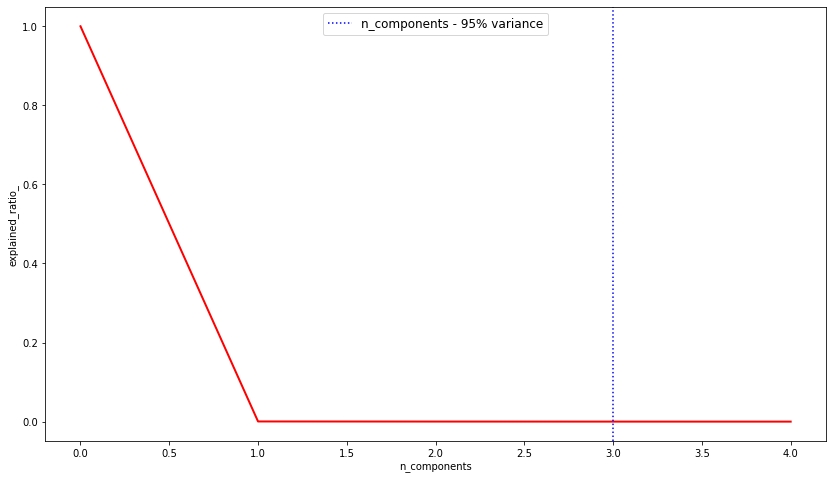

In [4]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = x.shape[1]

pca = PCA(n_components=n_components, random_state=453)
x_r = pca.fit(x).transform(x)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ",total_variance)
var_95 = total_variance*0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0,n_components),pca.explained_variance_)
a = pd.DataFrame(a,columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95 %
print("Variance explain with 2 components: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 5 components: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 10 components: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 components: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 18 components: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 20 components: ", sum(a["Explained Variance"][0:20]))



# Plotting the data
plt.figure(1, figsize=(14,8))
plt.plot(pca.explained_variance_ratio_,linewidth=2, c='r')
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95 %
plt.axvline(3,linestyle=':', label='n_components - 95% variance',c = 'blue')
plt.legend(prop=dict(size=12))
plt.show()            
            
            

In [5]:
# Running PCA again

pca_new = PCA(n_components=1, random_state=453)
x_r = pca_new.fit(x).transform(x)

## Scree plot

In [6]:
explained_variance = pca_new.explained_variance_ratio_
explained_variance

array([0.99904508])

In [7]:
import numpy as np
import plotly.express as px

In [8]:
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.999045,0.999
2,PC2,NaN,NaN
3,PC3,NaN,NaN


In [9]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

In [10]:
#%%capture
#!pip install kaleido
#!pip install plotly>=4.0.0
#!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
#!chmod +x /usr/local/bin/orca
#!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [11]:
#import os

#if not os.path.exists("images"):
#    os.mkdir("images")

In [12]:
#fig.write_image("images/fig1.svg")

## Train test and split

In [ ]:
from collections import Counter
print("Labels distribution:",Counter(y))

# train-test split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_r, y, random_state=10,train_size=0.7)
print("Train labels distribution:", Counter(y_train))
print("Test labels distribution:",Counter(y_test))


In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1712, 1)
(735, 1)
(1712,)
(735,)


## Train the model

In [15]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

## Predict test results

In [16]:
y_pred = ml.predict(x_test)

In [17]:
coefficents = ml.coef_
coefficents[0]

0.44695271704715633

In [18]:
intercept = ml.intercept_
intercept

1.0805619004824734

y = β0 + β1 · x1 +  β2 · x2 + ... + βn · xn

In [19]:
x_test[0]

array([-0.06038705])

In [20]:
y_pred[0]

1.0535717458746154

In [21]:
coefficents[0]*x_test[0] + intercept

array([1.05357175])

## Evaluate the model

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
r2_score = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE = math.sqrt(mean_squared_error(y_test, y_pred))

## Plot the results

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, DotProduct, WhiteKernel

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) + WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.



GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9)

In [26]:
sorted_X = np.array(list(sorted(x_test)))
y_pred_confidence, sigma = gp.predict(sorted_X, return_std=True)

In [27]:
model_str = "$" + "y =" + str(round(coefficents[0],2)) + "\cdot x + " + str(round(intercept,2)) + "$"
model_R2 = "$" + "R^2 = " + str(round(r2_score,4)) + "$"

[Text(0, 0.5, 'Predetto [V]'), Text(0.5, 0, 'Reale [V]')]

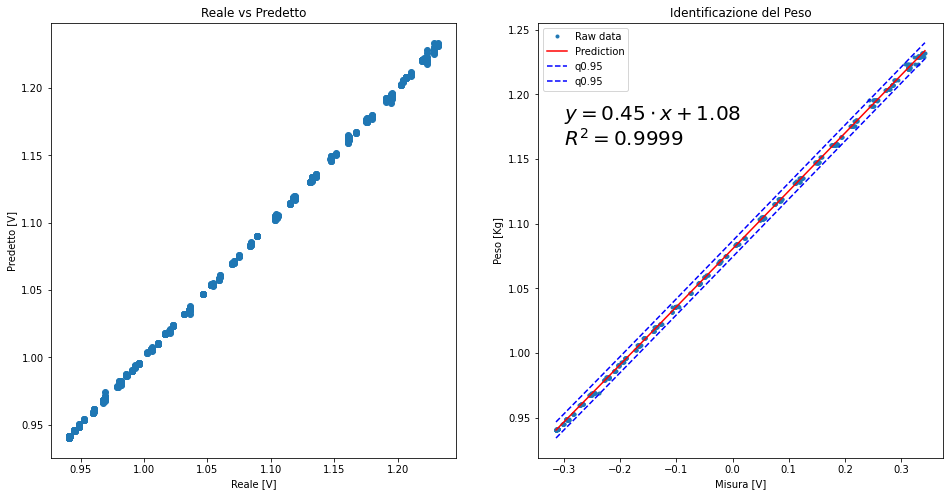

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[1].plot(x_test, y_test, '.', label="Raw data")
ax[1].plot(sorted_X, y_pred_confidence, label="Prediction", color="red")
ax[1].plot(sorted_X, y_pred_confidence + sigma * 1.96, 'b--', label="q0.95")
ax[1].plot(sorted_X, y_pred_confidence - sigma * 1.96, 'b--', label="q0.95")
ax[1].set_title("Identificazione del Peso")
ax[1].text(-0.3, 1.18, model_str, fontsize=20)
ax[1].text(-0.3, 1.16, model_R2, fontsize=20)
ax[1].set(xlabel='Misura [V]', ylabel='Peso [Kg]')
ax[1].legend();

ax[0].scatter(y_test,y_pred)
ax[0].set_title('Reale vs Predetto')
ax[0].set(xlabel='Reale [V]', ylabel='Predetto [V]')